Three  data sets are included in the data packet(IMS_rexnord Bearing Data.zip)

In [108]:
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Sony'

In [3]:
path =r'C:\Users\Sony\Desktop\MTP\ML project\bearing_data_set\2nd_test\2nd_test'

In [4]:
filename='2004.02.12.10.32.39'
path1=os.path.join(path,filename)

In [5]:
dataset=pd.read_csv(path1,sep='\t',header=None)

In [6]:
bearing_no =1
bearing_data=np.array(dataset.iloc[:,bearing_no-1])

bearing_data

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [7]:
temp=bearing_data
temp

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [8]:
#extration of feature from the bearing data

feature_matrix=np.zeros((1,9))

feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
def computer_skewness(x):
    n=len(x)
    third_moment = np.sum((x-np.mean(x))**3)/n
    s_3 =np.std(x,ddof=1)**3

    return third_moment/s_3
                          
                          

In [10]:
def compute_kurtosis(x):
    
    n=len(x)
    forth_moment=np.sum(x - np.mean(x)**4)/n
    s_4 = np.std(x,ddof=1)**4
    return forth_moment/s_4 -1
    

In [11]:
feature_matrix[0,0]=np.max(temp)
feature_matrix[0,1]=np.min(temp)
feature_matrix[0,2]=np.mean(temp)
feature_matrix[0,3]=np.std(temp,ddof=1)
feature_matrix[0,4]=np.sqrt(np.mean(temp**2))
feature_matrix[0,5]=computer_skewness(temp)
feature_matrix[0,6]=compute_kurtosis(temp)
feature_matrix[0,7]=feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8]=feature_matrix[0,4]/feature_matrix[0,2]

In [12]:
feature_matrix

array([[ 4.54000000e-01, -3.86000000e-01, -1.01959961e-02,
         7.34767249e-02,  7.41789986e-02,  8.39872836e-02,
        -3.50808984e+02,  6.12033067e+00, -7.27530669e+00]])

In [13]:
df=pd.DataFrame(feature_matrix)
df.index=[filename[:-3]]

In [14]:
df

0      1         2         3         4         5  \
2004.02.12.10.32  0.454 -0.386 -0.010196  0.073477  0.074179  0.083987   

                           6         7         8  
2004.02.12.10.32 -350.808984  6.120331 -7.275307

In [15]:
Time_feature_matrix=pd.DataFrame()

test_set=2

bearing_no=4 #provide the hearing number[1,2,3,4]

path=r'C:\Users\Sony\Desktop\MTP\ML project\bearing_data_set\2nd_test\2nd_test'

for filename in os.listdir(path):
    dataset =pd.read_csv(os.path.join(path,filename),sep='\t',header=None)
    
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])
    
    feature_matrix = np.zeros((1,9))
    temp=bearing_data
        
    feature_matrix[0,0]=np.max(temp)
    feature_matrix[0,1]=np.min(temp)
    feature_matrix[0,2]=np.mean(temp)
    feature_matrix[0,3]=np.std(temp,ddof=1)
    feature_matrix[0,4]=np.sqrt(np.mean(temp**2))
    feature_matrix[0,5]=computer_skewness(temp)
    feature_matrix[0,6]=compute_kurtosis(temp)
    feature_matrix[0,7]=feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8]=feature_matrix[0,4]/feature_matrix[0,2]
    
    df =pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    Time_feature_matrix = Time_feature_matrix.append(df)
    

C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\958304557.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\958304557.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\958304557.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\958304557.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix

In [16]:
Time_feature_matrix

0      1         2         3         4         5  \
2004.02.12.10.32  0.193 -0.264 -0.010026  0.053168  0.054103 -0.022078   
2004.02.12.10.42  0.249 -0.229 -0.003784  0.055974  0.056101  0.001582   
2004.02.12.10.52  0.354 -0.334 -0.003485  0.056038  0.056145  0.070444   
2004.02.12.11.02  0.513 -0.525 -0.003741  0.056686  0.056807 -0.036324   
2004.02.12.11.12  0.244 -0.212 -0.002703  0.056778  0.056841  0.019006   
...                 ...    ...       ...       ...       ...       ...   
2004.02.19.05.42  0.542 -0.544 -0.002939  0.148326  0.148351 -0.051945   
2004.02.19.05.52  0.527 -0.449 -0.003315  0.116586  0.116630  0.119884   
2004.02.19.06.02  0.625 -0.479 -0.003311  0.130544  0.130582  0.167966   
2004.02.19.06.12  0.005 -0.002  0.001786  0.001204  0.002154  0.656632   
2004.02.19.06.22  0.002 -0.005 -0.001695  0.001280  0.002124 -0.659071   

                             6         7          8  
2004.02.12.10.32 -1.255689e+03  3.567239  -5.396329  
2004.02.12.10.42 -3.864387e+02  4.438435 -14.827018  
2004.02.12.10.52 -3.544327e+02  6.305078 -16.108911  
2004.02.12.11.02 -3.633037e+02  9.030509 -15.186020  
2004.02.12.11.12 -2.610508e+02  4.292680 -21.032042  
...                        ...       ...        ...  
2004.02.19.05.42 -7.072374e+00  3.653494 -50.473985  
2004.02.19.05.52 -1.894415e+01  4.518571 -35.180992  
2004.02.19.06.02 -1.240048e+01  4.786252 -39.440269  
2004.02.19.06.12  8.490451e+08  2.321622   1.206167  
2004.02.19.06.22 -6.317149e+08  0.941574  -1.253000  

[984 rows x 9 columns]

In [17]:
Time_feature_matrix.columns=['max','min',
'mean','Standard deviation','RMS value','skewness','kurtosis'
,'crest factor','Form factor']
Time_feature_matrix.index=pd.to_datetime(Time_feature_matrix.index,format = '%Y.%m.%d.%H.%M')

Time_feature_matrix=Time_feature_matrix.sort_index()
#time _feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

max    min      mean  Standard deviation  RMS value  \
2004-02-12 10:32:00  0.193 -0.264 -0.010026            0.053168   0.054103   
2004-02-12 10:42:00  0.249 -0.229 -0.003784            0.055974   0.056101   
2004-02-12 10:52:00  0.354 -0.334 -0.003485            0.056038   0.056145   
2004-02-12 11:02:00  0.513 -0.525 -0.003741            0.056686   0.056807   
2004-02-12 11:12:00  0.244 -0.212 -0.002703            0.056778   0.056841   
...                    ...    ...       ...                 ...        ...   
2004-02-19 05:42:00  0.542 -0.544 -0.002939            0.148326   0.148351   
2004-02-19 05:52:00  0.527 -0.449 -0.003315            0.116586   0.116630   
2004-02-19 06:02:00  0.625 -0.479 -0.003311            0.130544   0.130582   
2004-02-19 06:12:00  0.005 -0.002  0.001786            0.001204   0.002154   
2004-02-19 06:22:00  0.002 -0.005 -0.001695            0.001280   0.002124   

                     skewness      kurtosis  crest factor  Form factor  
2004-02-12 10:32:00 -0.022078 -1.255689e+03      3.567239    -5.396329  
2004-02-12 10:42:00  0.001582 -3.864387e+02      4.438435   -14.827018  
2004-02-12 10:52:00  0.070444 -3.544327e+02      6.305078   -16.108911  
2004-02-12 11:02:00 -0.036324 -3.633037e+02      9.030509   -15.186020  
2004-02-12 11:12:00  0.019006 -2.610508e+02      4.292680   -21.032042  
...                       ...           ...           ...          ...  
2004-02-19 05:42:00 -0.051945 -7.072374e+00      3.653494   -50.473985  
2004-02-19 05:52:00  0.119884 -1.894415e+01      4.518571   -35.180992  
2004-02-19 06:02:00  0.167966 -1.240048e+01      4.786252   -39.440269  
2004-02-19 06:12:00  0.656632  8.490451e+08      2.321622     1.206167  
2004-02-19 06:22:00 -0.659071 -6.317149e+08      0.941574    -1.253000  

[984 rows x 9 columns]

In [19]:
#Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_test_{}.csv'.format(bearing_no,test_set))

# test2 bearing dataset visualization


In [18]:
df1=pd.read_csv('Time_feature_matrix_Bearing_1_test_2.csv',index_col='Unnamed: 0')
df2=pd.read_csv('Time_feature_matrix_Bearing_2_test_2.csv',index_col='Unnamed: 0')
df3=pd.read_csv('Time_feature_matrix_Bearing_3_test_2.csv',index_col='Unnamed: 0')
df4=pd.read_csv('Time_feature_matrix_Bearing_4_test_2.csv',index_col='Unnamed: 0')



In [19]:
df1.head()

max    min      mean  Standard deviation  RMS value  \
2004-02-12 10:32:00  0.454 -0.386 -0.010196            0.073477   0.074179   
2004-02-12 10:42:00  0.369 -0.388 -0.002585            0.075340   0.075382   
2004-02-12 10:52:00  0.503 -0.400 -0.002484            0.076191   0.076230   
2004-02-12 11:02:00  0.608 -0.576 -0.002277            0.078693   0.078724   
2004-02-12 11:12:00  0.391 -0.391 -0.002404            0.078439   0.078474   

                     skewness    kurtosis  crest factor  Form factor  
2004-02-12 10:32:00  0.083987 -350.808984      6.120331    -7.275307  
2004-02-12 10:42:00  0.052138  -81.234406      4.895038   -29.161382  
2004-02-12 10:52:00  0.032806  -74.710725      6.598472   -30.688508  
2004-02-12 11:02:00  0.041483  -60.367905      7.723217   -34.579322  
2004-02-12 11:12:00  0.028222  -64.499765      4.982524   -32.645152

In [20]:
df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)
df3.index = pd.to_datetime(df3.index)
df4.index = pd.to_datetime(df4.index)

In [128]:
df1

max    min      mean  Standard deviation  RMS value  \
2004-02-12 10:32:00  0.454 -0.386 -0.010196            0.073477   0.074179   
2004-02-12 10:42:00  0.369 -0.388 -0.002585            0.075340   0.075382   
2004-02-12 10:52:00  0.503 -0.400 -0.002484            0.076191   0.076230   
2004-02-12 11:02:00  0.608 -0.576 -0.002277            0.078693   0.078724   
2004-02-12 11:12:00  0.391 -0.391 -0.002404            0.078439   0.078474   
...                    ...    ...       ...                 ...        ...   
2004-02-19 05:42:00  4.998 -5.000 -0.002752            0.725014   0.725001   
2004-02-19 05:52:00  2.688 -2.881 -0.004487            0.462001   0.462012   
2004-02-19 06:02:00  3.501 -3.696 -0.001703            0.483844   0.483835   
2004-02-19 06:12:00  0.005  0.000  0.001857            0.000987   0.002103   
2004-02-19 06:22:00  0.002 -0.005 -0.001162            0.001000   0.001533   

                     skewness      kurtosis  crest factor  Form factor  
2004-02-12 10:32:00  0.083987 -3.508090e+02      6.120331    -7.275307  
2004-02-12 10:42:00  0.052138 -8.123441e+01      4.895038   -29.161382  
2004-02-12 10:52:00  0.032806 -7.471073e+01      6.598472   -30.688508  
2004-02-12 11:02:00  0.041483 -6.036791e+01      7.723217   -34.579322  
2004-02-12 11:12:00  0.028222 -6.449977e+01      4.982524   -32.645152  
...                       ...           ...           ...          ...  
2004-02-19 05:42:00 -0.510519 -1.009961e+00      6.893779  -263.426419  
2004-02-19 05:52:00 -0.325344 -1.098478e+00      5.818035  -102.977656  
2004-02-19 06:02:00 -0.377068 -1.031075e+00      7.235932  -284.094983  
2004-02-19 06:12:00  0.579656  1.953823e+09      2.377543     1.132578  
2004-02-19 06:22:00  0.317009 -1.163921e+09      1.304860    -1.319089  

[984 rows x 9 columns]

In [21]:
df1.columns

Index(['max', 'min', 'mean', 'Standard deviation', 'RMS value', 'skewness',
       'kurtosis', 'crest factor', 'Form factor'],
      dtype='object')

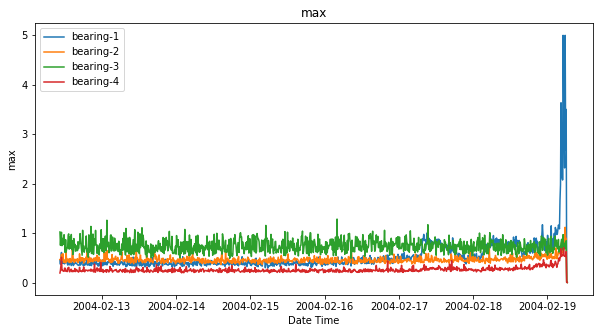

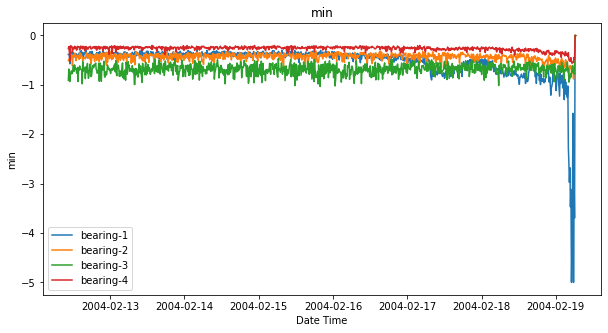

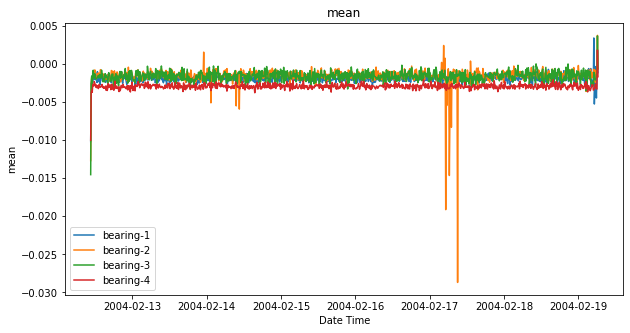

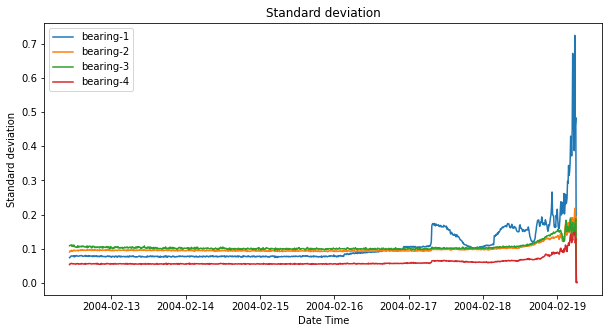

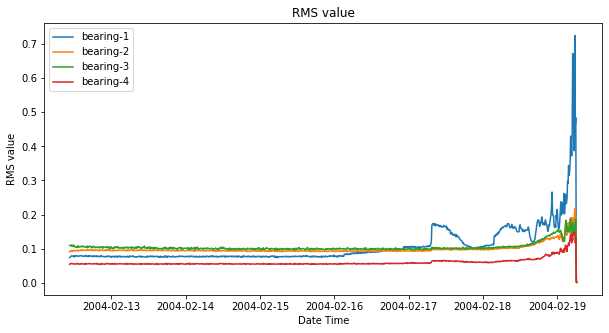

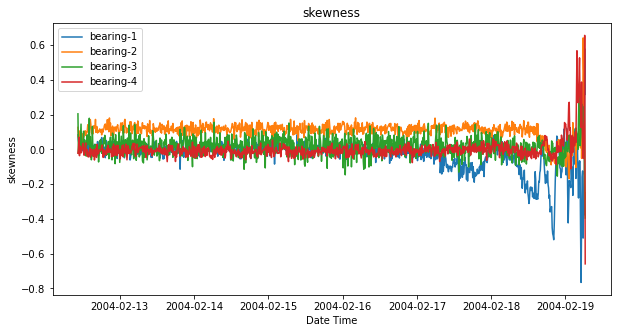

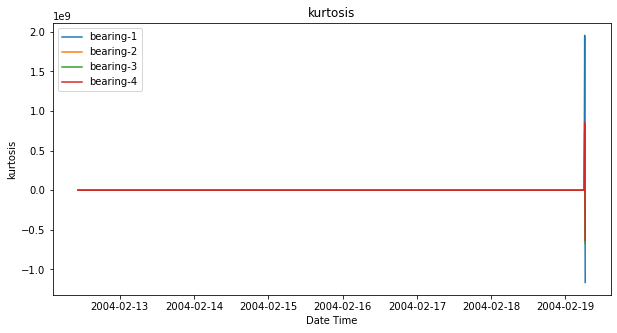

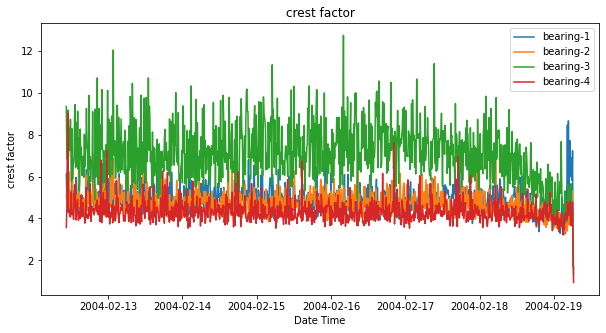

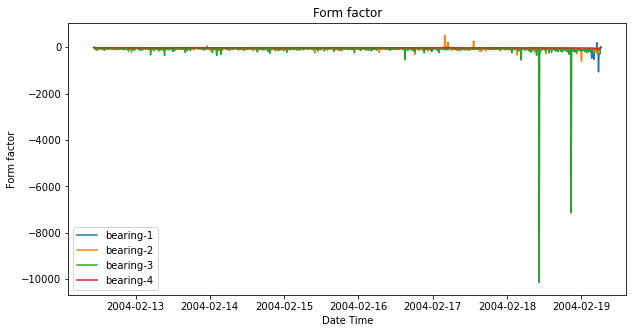

In [22]:
for col in (df1.columns):
    
    plt.figure(figsize=(10,5))
    
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    
    plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])
    
    plt.xlabel('Date Time')
    
    plt.ylabel(col)
    plt.title(col)
    plt.show

# test 2 fault feature extraction 

# saving outer  race fault 

In [131]:
df_irf=df1['2004-02-17 00:32:00':'2004-02-19 06:22:00' ]
fault=[]
for i in range(0,len(df_irf)):
    fault.append('Outer_Race')
    
df_irf['fault']=fault

df_irf

C:\Users\Sony\AppData\Local\Temp\ipykernel_8560\796173431.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_irf['fault']=fault


max    min      mean  Standard deviation  RMS value  \
2004-02-17 00:32:00  0.496 -0.461 -0.001632            0.104349   0.104360   
2004-02-17 00:42:00  0.459 -0.505 -0.001872            0.106614   0.106628   
2004-02-17 00:52:00  0.486 -0.483 -0.001659            0.106611   0.106622   
2004-02-17 01:02:00  0.581 -0.635 -0.002352            0.104679   0.104703   
2004-02-17 01:12:00  0.491 -0.466 -0.001825            0.104197   0.104210   
...                    ...    ...       ...                 ...        ...   
2004-02-19 05:42:00  4.998 -5.000 -0.002752            0.725014   0.725001   
2004-02-19 05:52:00  2.688 -2.881 -0.004487            0.462001   0.462012   
2004-02-19 06:02:00  3.501 -3.696 -0.001703            0.483844   0.483835   
2004-02-19 06:12:00  0.005  0.000  0.001857            0.000987   0.002103   
2004-02-19 06:22:00  0.002 -0.005 -0.001162            0.001000   0.001533   

                     skewness      kurtosis  crest factor  Form factor  \
2004-02-17 00:32:00 -0.037080 -1.476810e+01      4.752800   -63.929273   
2004-02-17 00:42:00 -0.037403 -1.548912e+01      4.304691   -56.960165   
2004-02-17 00:52:00 -0.014484 -1.384409e+01      4.558168   -64.257958   
2004-02-17 01:02:00 -0.038783 -2.059141e+01      5.549046   -44.509943   
2004-02-17 01:12:00  0.030035 -1.648356e+01      4.711635   -57.098371   
...                       ...           ...           ...          ...   
2004-02-19 05:42:00 -0.510519 -1.009961e+00      6.893779  -263.426419   
2004-02-19 05:52:00 -0.325344 -1.098478e+00      5.818035  -102.977656   
2004-02-19 06:02:00 -0.377068 -1.031075e+00      7.235932  -284.094983   
2004-02-19 06:12:00  0.579656  1.953823e+09      2.377543     1.132578   
2004-02-19 06:22:00  0.317009 -1.163921e+09      1.304860    -1.319089   

                          fault  
2004-02-17 00:32:00  Outer_Race  
2004-02-17 00:42:00  Outer_Race  
2004-02-17 00:52:00  Outer_Race  
2004-02-17 01:02:00  Outer_Race  
2004-02-17 01:12:00  Outer_Race  
...                         ...  
2004-02-19 05:42:00  Outer_Race  
2004-02-19 05:52:00  Outer_Race  
2004-02-19 06:02:00  Outer_Race  
2004-02-19 06:12:00  Outer_Race  
2004-02-19 06:22:00  Outer_Race  

[324 rows x 10 columns]

In [132]:
df_irf.to_csv('outer_race.csv',index=False)

# Test 1

In [23]:
Time_feature_matrix=pd.DataFrame()

test_set=1

bearing_no=1 #provide the hearing number[1,2,3,4]

path=r'C:\Users\Sony\Desktop\MTP\ML project\bearing_data_set\1st_test\1st_test'

for filename in os.listdir(path):
    dataset =pd.read_csv(os.path.join(path,filename),sep='\t',header=None)
    
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])
    
    feature_matrix = np.zeros((1,9))
    temp=bearing_data
        
    feature_matrix[0,0]=np.max(temp)
    feature_matrix[0,1]=np.min(temp)
    feature_matrix[0,2]=np.mean(temp)
    feature_matrix[0,3]=np.std(temp,ddof=1)
    feature_matrix[0,4]=np.sqrt(np.mean(temp**2))
    feature_matrix[0,5]=computer_skewness(temp)
    feature_matrix[0,6]=compute_kurtosis(temp)
    feature_matrix[0,7]=feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8]=feature_matrix[0,4]/feature_matrix[0,2]
    
    df =pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    Time_feature_matrix = Time_feature_matrix.append(df)
    
Time_feature_matrix.columns=['max','min',
'mean','Standard deviation','RMS value','skewness','kurtosis'
,'crest factor','Form factor']
Time_feature_matrix.index=pd.to_datetime(Time_feature_matrix.index,format = '%Y.%m.%d.%H.%M')

Time_feature_matrix=Time_feature_matrix.sort_index()
#time _feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\2055604391.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\2055604391.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\2055604391.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\2055604391.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_ma

max    min      mean  Standard deviation  RMS value  \
2003-10-22 12:06:00  0.388 -0.720 -0.094593            0.081124   0.124614   
2003-10-22 12:09:00  0.388 -0.654 -0.094903            0.079517   0.123811   
2003-10-22 12:14:00  0.317 -0.623 -0.096187            0.080219   0.125246   
2003-10-22 12:19:00  0.457 -0.598 -0.095613            0.080827   0.125197   
2003-10-22 12:24:00  0.388 -0.623 -0.095133            0.082036   0.125618   
...                    ...    ...       ...                 ...        ...   
2003-11-25 16:07:00  0.476 -0.669 -0.117540            0.120931   0.168639   
2003-11-25 23:13:00  0.513 -0.803 -0.117403            0.129745   0.174975   
2003-11-25 23:19:00  0.449 -0.710 -0.118305            0.128373   0.174571   
2003-11-25 23:29:00  0.522 -0.776 -0.118272            0.126904   0.173471   
2003-11-25 23:39:00  0.630 -0.808 -0.117158            0.128895   0.174181   

                     skewness     kurtosis  crest factor  Form factor  
2003-10-22 12:06:00 -0.029991 -2186.883502      3.113619    -1.317370  
2003-10-22 12:09:00 -0.070070 -2376.754305      3.133804    -1.304613  
2003-10-22 12:14:00 -0.041643 -2325.856352      2.531011    -1.302116  
2003-10-22 12:19:00  0.005161 -2243.227653      3.650234    -1.309422  
2003-10-22 12:24:00 -0.060191 -2103.238015      3.088726    -1.320447  
...                       ...          ...           ...          ...  
2003-11-25 16:07:00  0.000653  -551.470465      2.822593    -1.434745  
2003-11-25 23:13:00 -0.052188  -415.976020      2.931849    -1.490383  
2003-11-25 23:19:00 -0.080797  -437.339046      2.572023    -1.475599  
2003-11-25 23:29:00 -0.009058  -457.765123      3.009143    -1.466712  
2003-11-25 23:39:00 -0.040123  -426.133239      3.616919    -1.486720  

[2156 rows x 9 columns]

In [24]:
Time_feature_matrix

max    min      mean  Standard deviation  RMS value  \
2003-10-22 12:06:00  0.388 -0.720 -0.094593            0.081124   0.124614   
2003-10-22 12:09:00  0.388 -0.654 -0.094903            0.079517   0.123811   
2003-10-22 12:14:00  0.317 -0.623 -0.096187            0.080219   0.125246   
2003-10-22 12:19:00  0.457 -0.598 -0.095613            0.080827   0.125197   
2003-10-22 12:24:00  0.388 -0.623 -0.095133            0.082036   0.125618   
...                    ...    ...       ...                 ...        ...   
2003-11-25 16:07:00  0.476 -0.669 -0.117540            0.120931   0.168639   
2003-11-25 23:13:00  0.513 -0.803 -0.117403            0.129745   0.174975   
2003-11-25 23:19:00  0.449 -0.710 -0.118305            0.128373   0.174571   
2003-11-25 23:29:00  0.522 -0.776 -0.118272            0.126904   0.173471   
2003-11-25 23:39:00  0.630 -0.808 -0.117158            0.128895   0.174181   

                     skewness     kurtosis  crest factor  Form factor  
2003-10-22 12:06:00 -0.029991 -2186.883502      3.113619    -1.317370  
2003-10-22 12:09:00 -0.070070 -2376.754305      3.133804    -1.304613  
2003-10-22 12:14:00 -0.041643 -2325.856352      2.531011    -1.302116  
2003-10-22 12:19:00  0.005161 -2243.227653      3.650234    -1.309422  
2003-10-22 12:24:00 -0.060191 -2103.238015      3.088726    -1.320447  
...                       ...          ...           ...          ...  
2003-11-25 16:07:00  0.000653  -551.470465      2.822593    -1.434745  
2003-11-25 23:13:00 -0.052188  -415.976020      2.931849    -1.490383  
2003-11-25 23:19:00 -0.080797  -437.339046      2.572023    -1.475599  
2003-11-25 23:29:00 -0.009058  -457.765123      3.009143    -1.466712  
2003-11-25 23:39:00 -0.040123  -426.133239      3.616919    -1.486720  

[2156 rows x 9 columns]

In [38]:
#Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_test_{}.csv'.format(bearing_no,test_set))

In [83]:

Time_feature_matrix=pd.DataFrame()

test_set=3

bearing_no=1 #provide the hearing number[1,2,3,4]

path=r'C:\Users\Sony\Desktop\MTP\ML project\bearing_data_set\3rd_test\4th_test\txt'

for filename in os.listdir(path):
    dataset =pd.read_csv(os.path.join(path,filename),sep='\t',header=None)
    
    bearing_data = np.array(dataset.iloc[:,bearing_no-1])
    
    feature_matrix = np.zeros((1,9))
    temp=bearing_data
        
    feature_matrix[0,0]=np.max(temp)
    feature_matrix[0,1]=np.min(temp)
    feature_matrix[0,2]=np.mean(temp)
    feature_matrix[0,3]=np.std(temp,ddof=1)
    feature_matrix[0,4]=np.sqrt(np.mean(temp**2))
    feature_matrix[0,5]=computer_skewness(temp)
    feature_matrix[0,6]=compute_kurtosis(temp)
    feature_matrix[0,7]=feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8]=feature_matrix[0,4]/feature_matrix[0,2]
    
    df =pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    Time_feature_matrix = Time_feature_matrix.append(df)
Time_feature_matrix.columns=['max','min',
'mean','Standard deviation','RMS value','skewness','kurtosis'
,'crest factor','Form factor']
Time_feature_matrix.index=pd.to_datetime(Time_feature_matrix.index,format = '%Y.%m.%d.%H.%M')

Time_feature_matrix=Time_feature_matrix.sort_index()
#time _feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

C:\Users\Sony\AppData\Local\Temp\ipykernel_8560\2829849616.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8560\2829849616.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8560\2829849616.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_matrix.append(df)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8560\2829849616.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Time_feature_matrix = Time_feature_ma

max    min      mean  Standard deviation  RMS value  \
2004-03-04 09:27:00  0.547 -0.569 -0.004715            0.079631   0.079768   
2004-03-04 09:32:00  0.491 -0.461 -0.005102            0.078514   0.078678   
2004-03-04 09:42:00  0.515 -0.454 -0.002242            0.079785   0.079815   
2004-03-04 09:52:00  0.520 -0.552 -0.002552            0.081044   0.081082   
2004-03-04 10:02:00  0.369 -0.381 -0.002534            0.079126   0.079165   
...                    ...    ...       ...                 ...        ...   
2004-04-18 02:02:00  0.742 -0.667 -0.002483            0.154769   0.154785   
2004-04-18 02:12:00  0.613 -0.576 -0.001885            0.137860   0.137870   
2004-04-18 02:22:00  0.754 -0.688 -0.002402            0.147165   0.147181   
2004-04-18 02:32:00  0.933 -0.632 -0.003033            0.154456   0.154482   
2004-04-18 02:42:00  0.005 -0.002  0.001533            0.001143   0.001912   

                     skewness      kurtosis  crest factor  Form factor  
2004-03-04 09:27:00  0.030875 -1.182522e+02      6.857363   -16.919417  
2004-03-04 09:32:00 -0.013806 -1.352461e+02      6.240622   -15.422493  
2004-03-04 09:42:00  0.033417 -5.632597e+01      6.452419   -35.600825  
2004-03-04 09:52:00 -0.027038 -6.016076e+01      6.413225   -31.769056  
2004-03-04 10:02:00 -0.017774 -6.564504e+01      4.661149   -31.240121  
...                       ...           ...           ...          ...  
2004-04-18 02:02:00  0.161841 -5.327818e+00      4.793745   -62.334039  
2004-04-18 02:12:00  0.109001 -6.219956e+00      4.446217   -73.121270  
2004-04-18 02:22:00  0.291569 -6.120113e+00      5.122955   -61.285383  
2004-04-18 02:32:00  0.440079 -6.328272e+00      6.039545   -50.941742  
2004-04-18 02:42:00  0.436012  8.987489e+08      2.615004     1.247289  

[6324 rows x 9 columns]

In [97]:
Time_feature_matrix

max    min      mean  Standard deviation  RMS value  \
2003-10-22 12:06:00  0.388 -0.720 -0.094593            0.081124   0.124614   
2003-10-22 12:09:00  0.388 -0.654 -0.094903            0.079517   0.123811   
2003-10-22 12:14:00  0.317 -0.623 -0.096187            0.080219   0.125246   
2003-10-22 12:19:00  0.457 -0.598 -0.095613            0.080827   0.125197   
2003-10-22 12:24:00  0.388 -0.623 -0.095133            0.082036   0.125618   
...                    ...    ...       ...                 ...        ...   
2003-11-25 16:07:00  0.476 -0.669 -0.117540            0.120931   0.168639   
2003-11-25 23:13:00  0.513 -0.803 -0.117403            0.129745   0.174975   
2003-11-25 23:19:00  0.449 -0.710 -0.118305            0.128373   0.174571   
2003-11-25 23:29:00  0.522 -0.776 -0.118272            0.126904   0.173471   
2003-11-25 23:39:00  0.630 -0.808 -0.117158            0.128895   0.174181   

                     skewness     kurtosis  crest factor  Form factor  
2003-10-22 12:06:00 -0.029991 -2186.883502      3.113619    -1.317370  
2003-10-22 12:09:00 -0.070070 -2376.754305      3.133804    -1.304613  
2003-10-22 12:14:00 -0.041643 -2325.856352      2.531011    -1.302116  
2003-10-22 12:19:00  0.005161 -2243.227653      3.650234    -1.309422  
2003-10-22 12:24:00 -0.060191 -2103.238015      3.088726    -1.320447  
...                       ...          ...           ...          ...  
2003-11-25 16:07:00  0.000653  -551.470465      2.822593    -1.434745  
2003-11-25 23:13:00 -0.052188  -415.976020      2.931849    -1.490383  
2003-11-25 23:19:00 -0.080797  -437.339046      2.572023    -1.475599  
2003-11-25 23:29:00 -0.009058  -457.765123      3.009143    -1.466712  
2003-11-25 23:39:00 -0.040123  -426.133239      3.616919    -1.486720  

[2156 rows x 9 columns]

In [87]:
Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_test_{}.csv'.format(bearing_no,test_set))

# for test-1
Bearing-3 showed inner defect and bearing 4 showed roller element defect

In [25]:
test_no=1


df1=pd.read_csv('Time_feature_matrix_Bearing_1_test_{}.csv'.format(test_no),index_col='Unnamed: 0')
df2=pd.read_csv('Time_feature_matrix_Bearing_2_test_{}.csv'.format(test_no),index_col='Unnamed: 0')
df3=pd.read_csv('Time_feature_matrix_Bearing_3_test_{}.csv'.format(test_no),index_col='Unnamed: 0')
df4=pd.read_csv('Time_feature_matrix_Bearing_4_test_{}.csv'.format(test_no),index_col='Unnamed: 0')

df1.index=pd.to_datetime(df1.index)


In [26]:
df1

max    min      mean  Standard deviation  RMS value  \
2003-10-22 12:06:00  0.388 -0.720 -0.094593            0.081124   0.124614   
2003-10-22 12:09:00  0.388 -0.654 -0.094903            0.079517   0.123811   
2003-10-22 12:14:00  0.317 -0.623 -0.096187            0.080219   0.125246   
2003-10-22 12:19:00  0.457 -0.598 -0.095613            0.080827   0.125197   
2003-10-22 12:24:00  0.388 -0.623 -0.095133            0.082036   0.125618   
...                    ...    ...       ...                 ...        ...   
2003-11-25 16:07:00  0.476 -0.669 -0.117540            0.120931   0.168639   
2003-11-25 23:13:00  0.513 -0.803 -0.117403            0.129745   0.174975   
2003-11-25 23:19:00  0.449 -0.710 -0.118305            0.128373   0.174571   
2003-11-25 23:29:00  0.522 -0.776 -0.118272            0.126904   0.173471   
2003-11-25 23:39:00  0.630 -0.808 -0.117158            0.128895   0.174181   

                     skewness     kurtosis  crest factor  Form factor  
2003-10-22 12:06:00 -0.029991 -2186.883502      3.113619    -1.317370  
2003-10-22 12:09:00 -0.070070 -2376.754305      3.133804    -1.304613  
2003-10-22 12:14:00 -0.041643 -2325.856352      2.531011    -1.302116  
2003-10-22 12:19:00  0.005161 -2243.227653      3.650234    -1.309422  
2003-10-22 12:24:00 -0.060191 -2103.238015      3.088726    -1.320447  
...                       ...          ...           ...          ...  
2003-11-25 16:07:00  0.000653  -551.470465      2.822593    -1.434745  
2003-11-25 23:13:00 -0.052188  -415.976020      2.931849    -1.490383  
2003-11-25 23:19:00 -0.080797  -437.339046      2.572023    -1.475599  
2003-11-25 23:29:00 -0.009058  -457.765123      3.009143    -1.466712  
2003-11-25 23:39:00 -0.040123  -426.133239      3.616919    -1.486720  

[2156 rows x 9 columns]

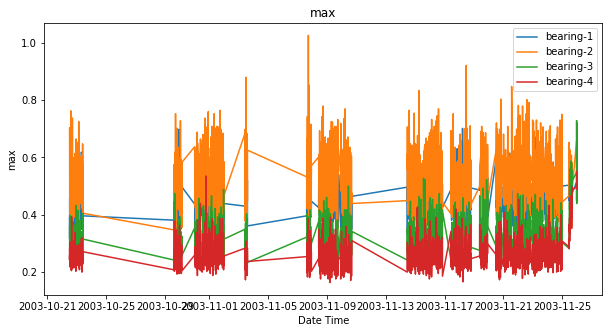

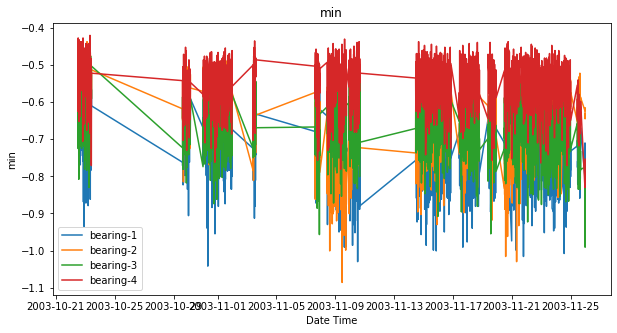

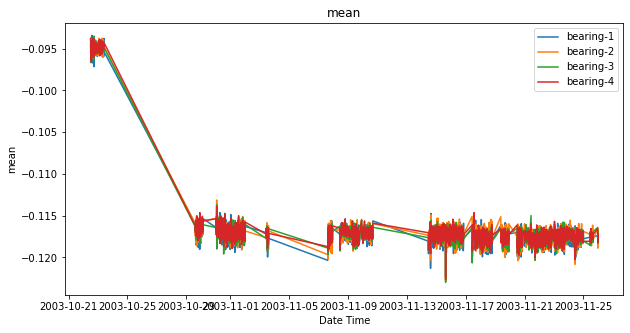

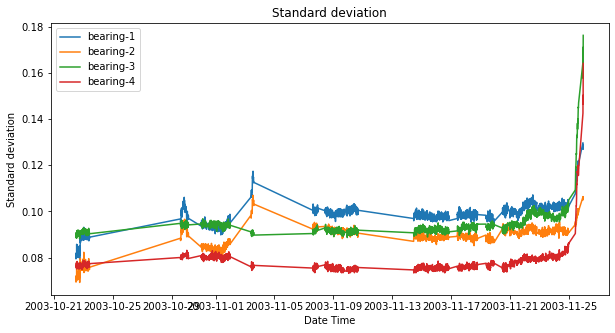

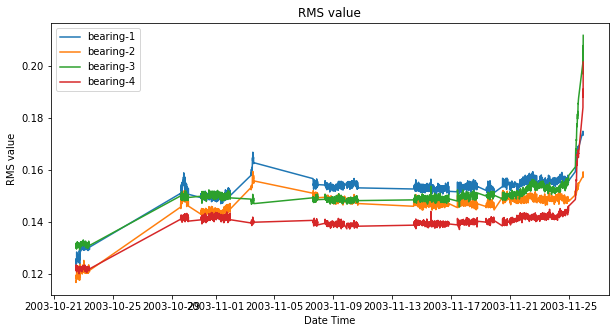

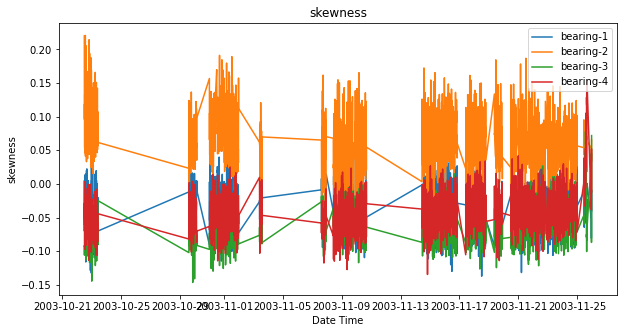

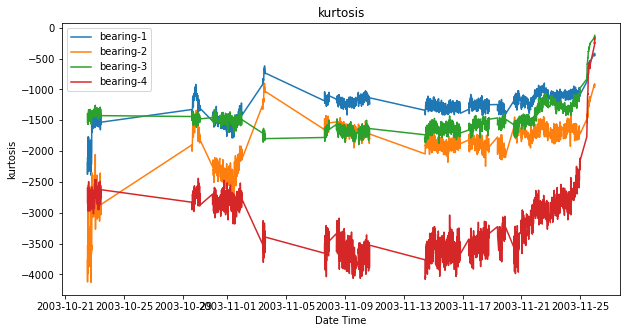

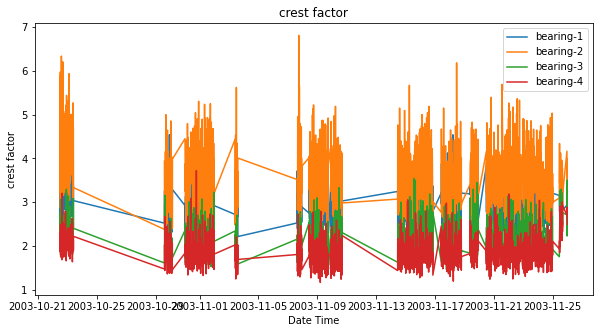

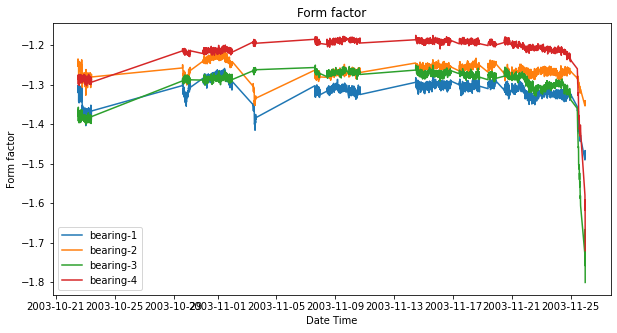

In [27]:

for col in (df1.columns):
    
    plt.figure(figsize=(10,5))
    
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    
    plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])
    
    plt.xlabel('Date Time')
    
    plt.ylabel(col)
    plt.title(col)
    plt.show

# Inner race defect irf

In [102]:
df_irf=df3['2003-11-21 00:32:00':'2003-11-25 23:39:00' ]
fault=[]
for i in range(0,len(df_irf)):
    fault.append('Inner_Race')
    
df_irf['fault']=fault

df_irf

C:\Users\Sony\AppData\Local\Temp\ipykernel_8560\671628145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_irf['fault']=fault


max    min      mean  Standard deviation  RMS value  \
2003-11-21 00:34:00  0.315 -0.598 -0.117176            0.093689   0.150024   
2003-11-21 00:44:00  0.388 -0.627 -0.117639            0.093396   0.150204   
2003-11-21 00:54:00  0.376 -0.725 -0.118024            0.093985   0.150873   
2003-11-21 01:04:00  0.332 -0.757 -0.117134            0.092784   0.149428   
2003-11-21 01:14:00  0.291 -0.625 -0.117235            0.094154   0.150362   
...                    ...    ...       ...                 ...        ...   
2003-11-25 16:07:00  0.518 -0.781 -0.116901            0.146956   0.187779   
2003-11-25 23:13:00  0.547 -0.776 -0.116428            0.164493   0.201525   
2003-11-25 23:19:00  0.728 -0.869 -0.118304            0.170994   0.207927   
2003-11-25 23:29:00  0.439 -0.991 -0.118210            0.157582   0.196989   
2003-11-25 23:39:00  0.715 -0.806 -0.117671            0.176181   0.211860   

                     skewness     kurtosis  crest factor  Form factor  \
2003-11-21 00:34:00 -0.066519 -1524.299068      2.099659    -1.280337   
2003-11-21 00:44:00 -0.051036 -1549.598841      2.583150    -1.276826   
2003-11-21 00:54:00 -0.058157 -1516.122836      2.492168    -1.278317   
2003-11-21 01:04:00 -0.040069 -1584.032999      2.221806    -1.275705   
2003-11-21 01:14:00 -0.066275 -1495.178516      1.935335    -1.282564   
...                       ...          ...           ...          ...   
2003-11-25 16:07:00 -0.067323  -252.048150      2.758560    -1.606308   
2003-11-25 23:13:00  0.035610  -160.277108      2.714309    -1.730891   
2003-11-25 23:19:00  0.045444  -139.609376      3.501234    -1.757559   
2003-11-25 23:29:00 -0.086948  -193.016958      2.228553    -1.666433   
2003-11-25 23:39:00  0.071838  -123.331864      3.374864    -1.800442   

                          fault  
2003-11-21 00:34:00  Inner_Race  
2003-11-21 00:44:00  Inner_Race  
2003-11-21 00:54:00  Inner_Race  
2003-11-21 01:04:00  Inner_Race  
2003-11-21 01:14:00  Inner_Race  
...                         ...  
2003-11-25 16:07:00  Inner_Race  
2003-11-25 23:13:00  Inner_Race  
2003-11-25 23:19:00  Inner_Race  
2003-11-25 23:29:00  Inner_Race  
2003-11-25 23:39:00  Inner_Race  

[536 rows x 10 columns]

In [103]:
df_irf.to_csv('inner_race.csv',index=False)

In [104]:
df_irf=df4['2003-11-21 00:32:00':'2003-11-25 23:39:00' ]
fault=[]
for i in range(0,len(df_irf)):
    fault.append('Roller_element')
    
df_irf['fault']=fault

df_irf

C:\Users\Sony\AppData\Local\Temp\ipykernel_8560\387649209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_irf['fault']=fault


max    min      mean  Standard deviation  RMS value  \
2003-11-21 00:34:00  0.261 -0.562 -0.117867            0.076821   0.140690   
2003-11-21 00:44:00  0.295 -0.657 -0.116988            0.076044   0.139530   
2003-11-21 00:54:00  0.269 -0.525 -0.117555            0.076884   0.140464   
2003-11-21 01:04:00  0.220 -0.527 -0.116833            0.075196   0.138940   
2003-11-21 01:14:00  0.327 -0.532 -0.118223            0.077386   0.141297   
...                    ...    ...       ...                 ...        ...   
2003-11-25 16:07:00  0.488 -0.598 -0.117200            0.117993   0.166306   
2003-11-25 23:13:00  0.496 -0.830 -0.116559            0.142499   0.184095   
2003-11-25 23:19:00  0.552 -0.791 -0.118188            0.150242   0.191155   
2003-11-25 23:29:00  0.488 -0.820 -0.118192            0.146346   0.188110   
2003-11-25 23:39:00  0.503 -0.754 -0.117210            0.164026   0.201597   

                     skewness     kurtosis  crest factor  Form factor  \
2003-11-21 00:34:00 -0.009869 -3390.927437      1.855141    -1.193636   
2003-11-21 00:44:00 -0.037429 -3505.112357      2.114243    -1.192685   
2003-11-21 00:54:00 -0.017772 -3370.797605      1.915087    -1.194876   
2003-11-21 01:04:00 -0.022964 -3660.930542      1.583422    -1.189213   
2003-11-21 01:14:00 -0.056806 -3302.999738      2.314273    -1.195177   
...                       ...          ...           ...          ...   
2003-11-25 16:07:00  0.154388  -606.613678      2.934349    -1.418989   
2003-11-25 23:13:00 -0.038668  -284.129255      2.694264    -1.579417   
2003-11-25 23:19:00 -0.023059  -233.339926      2.887714    -1.617372   
2003-11-25 23:29:00  0.052214  -259.096354      2.594227    -1.591566   
2003-11-25 23:39:00 -0.011990  -163.187879      2.495076    -1.719959   

                              fault  
2003-11-21 00:34:00  Roller_element  
2003-11-21 00:44:00  Roller_element  
2003-11-21 00:54:00  Roller_element  
2003-11-21 01:04:00  Roller_element  
2003-11-21 01:14:00  Roller_element  
...                             ...  
2003-11-25 16:07:00  Roller_element  
2003-11-25 23:13:00  Roller_element  
2003-11-25 23:19:00  Roller_element  
2003-11-25 23:29:00  Roller_element  
2003-11-25 23:39:00  Roller_element  

[536 rows x 10 columns]

In [105]:
df_irf.to_csv('Roller_element.csv',index=False)

# test3

In [28]:
test_no=3


df1=pd.read_csv('Time_feature_matrix_Bearing_1_test_{}.csv'.format(test_no),index_col='Unnamed: 0')
df2=pd.read_csv('Time_feature_matrix_Bearing_2_test_{}.csv'.format(test_no),index_col='Unnamed: 0')
df3=pd.read_csv('Time_feature_matrix_Bearing_3_test_{}.csv'.format(test_no),index_col='Unnamed: 0')
df4=pd.read_csv('Time_feature_matrix_Bearing_4_test_{}.csv'.format(test_no),index_col='Unnamed: 0')

df1.index=pd.to_datetime(df1.index)


In [29]:
df1

max    min      mean  Standard deviation  RMS value  \
2004-03-04 09:27:00  0.547 -0.569 -0.004715            0.079631   0.079768   
2004-03-04 09:32:00  0.491 -0.461 -0.005102            0.078514   0.078678   
2004-03-04 09:42:00  0.515 -0.454 -0.002242            0.079785   0.079815   
2004-03-04 09:52:00  0.520 -0.552 -0.002552            0.081044   0.081082   
2004-03-04 10:02:00  0.369 -0.381 -0.002534            0.079126   0.079165   
...                    ...    ...       ...                 ...        ...   
2004-04-18 02:02:00  0.742 -0.667 -0.002483            0.154769   0.154785   
2004-04-18 02:12:00  0.613 -0.576 -0.001885            0.137860   0.137870   
2004-04-18 02:22:00  0.754 -0.688 -0.002402            0.147165   0.147181   
2004-04-18 02:32:00  0.933 -0.632 -0.003033            0.154456   0.154482   
2004-04-18 02:42:00  0.005 -0.002  0.001533            0.001143   0.001912   

                     skewness      kurtosis  crest factor  Form factor  
2004-03-04 09:27:00  0.030875 -1.182522e+02      6.857363   -16.919417  
2004-03-04 09:32:00 -0.013806 -1.352461e+02      6.240622   -15.422493  
2004-03-04 09:42:00  0.033417 -5.632597e+01      6.452419   -35.600825  
2004-03-04 09:52:00 -0.027038 -6.016076e+01      6.413225   -31.769056  
2004-03-04 10:02:00 -0.017774 -6.564504e+01      4.661149   -31.240121  
...                       ...           ...           ...          ...  
2004-04-18 02:02:00  0.161841 -5.327818e+00      4.793745   -62.334039  
2004-04-18 02:12:00  0.109001 -6.219956e+00      4.446217   -73.121270  
2004-04-18 02:22:00  0.291569 -6.120113e+00      5.122955   -61.285383  
2004-04-18 02:32:00  0.440079 -6.328272e+00      6.039545   -50.941742  
2004-04-18 02:42:00  0.436012  8.987489e+08      2.615004     1.247289  

[6324 rows x 9 columns]

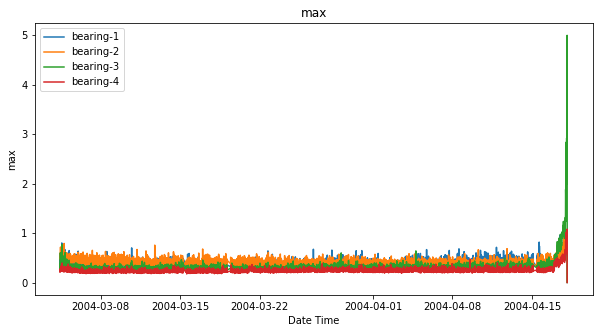

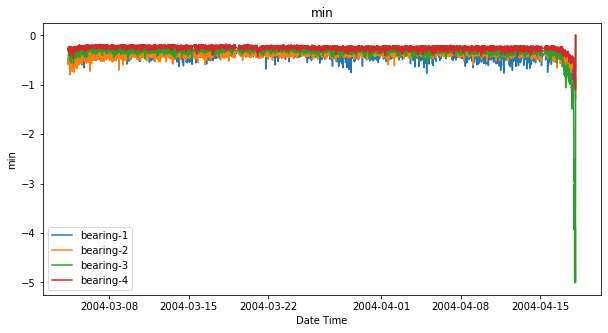

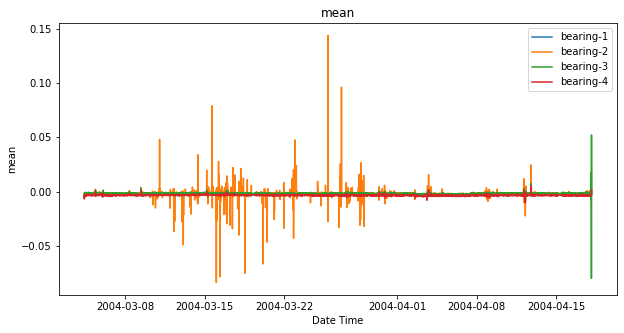

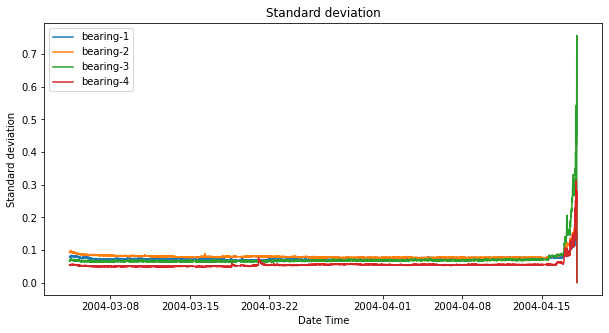

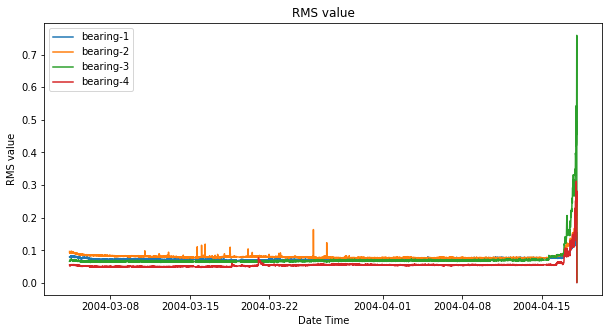

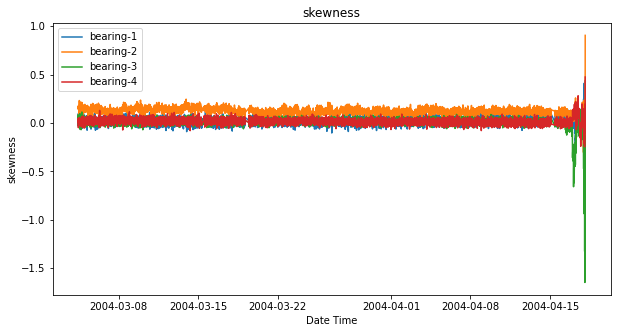

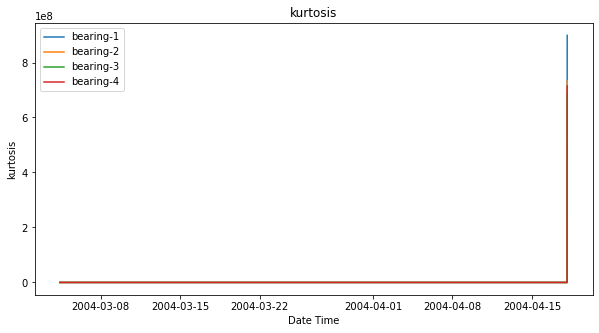

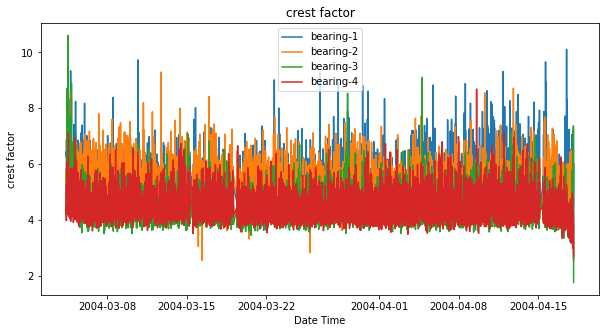

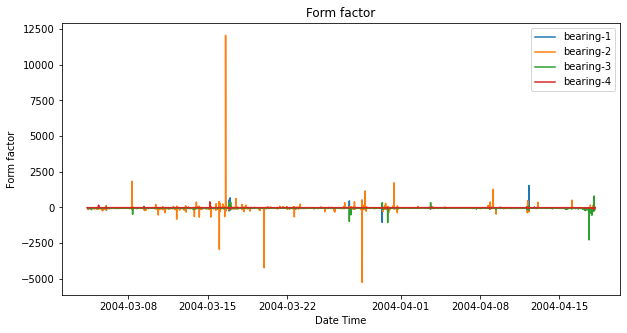

In [30]:
 for col in (df1.columns):
    
    plt.figure(figsize=(10,5))
    
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    
    plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])
    
    plt.xlabel('Date Time')
    
    plt.ylabel(col)
    plt.title(col)
    plt.show

# Saving Outer race Fault


In [31]:
df_irf=df3['2004-04-15 00:32:00':'2004-04-18 02:42:00' ]
fault=[]
for i in range(0,len(df_irf)):
    fault.append('Outer_Race')
    
df_irf['fault']=fault

df_irf

C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\4233662651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_irf['fault']=fault


max    min      mean  Standard deviation  RMS value  \
2004-04-15 00:41:00  0.322 -0.364 -0.001237            0.070923   0.070932   
2004-04-15 00:51:00  0.322 -0.278 -0.002501            0.071059   0.071101   
2004-04-15 01:01:00  0.308 -0.334 -0.002073            0.071137   0.071165   
2004-04-15 01:11:00  0.378 -0.386 -0.001819            0.072138   0.072159   
2004-04-15 01:21:00  0.325 -0.283 -0.002574            0.069432   0.069478   
...                    ...    ...       ...                 ...        ...   
2004-04-18 02:02:00  3.167 -5.000  0.017613            0.495062   0.495363   
2004-04-18 02:12:00  2.378 -3.899 -0.002114            0.454472   0.454466   
2004-04-18 02:22:00  4.346 -5.000 -0.079840            0.584635   0.590047   
2004-04-18 02:32:00  4.998 -5.000  0.052137            0.756990   0.758765   
2004-04-18 02:42:00  0.007  0.000  0.003663            0.001520   0.003966   

                     skewness      kurtosis  crest factor  Form factor  \
2004-04-15 00:41:00  0.028925 -4.989722e+01      4.539574   -57.334430   
2004-04-15 00:51:00  0.017337 -9.908268e+01      4.528756   -28.432149   
2004-04-15 01:01:00  0.037914 -8.195174e+01      4.327940   -34.328937   
2004-04-15 01:11:00  0.025999 -6.817811e+01      5.238438   -39.665421   
2004-04-15 01:21:00  0.009285 -1.117613e+02      4.677755   -26.991382   
...                       ...           ...           ...          ...   
2004-04-18 02:02:00 -1.648364 -7.067768e-01      6.393285    28.124430   
2004-04-18 02:12:00 -0.656841 -1.049556e+00      5.232514  -214.967877   
2004-04-18 02:22:00 -0.426006 -1.683761e+00      7.365514    -7.390347   
2004-04-18 02:32:00 -0.220131 -8.412459e-01      6.587018    14.553238   
2004-04-18 02:42:00 -0.135492  6.861055e+08      1.765154     1.082688   

                          fault  
2004-04-15 00:41:00  Outer_Race  
2004-04-15 00:51:00  Outer_Race  
2004-04-15 01:01:00  Outer_Race  
2004-04-15 01:11:00  Outer_Race  
2004-04-15 01:21:00  Outer_Race  
...                         ...  
2004-04-18 02:02:00  Outer_Race  
2004-04-18 02:12:00  Outer_Race  
2004-04-18 02:22:00  Outer_Race  
2004-04-18 02:32:00  Outer_Race  
2004-04-18 02:42:00  Outer_Race  

[403 rows x 10 columns]

In [32]:
df_irf.to_csv('OUTER_RACE_TEST3.csv',index=False)

# collecting the normal data from bearing


In [39]:
Test=[1,2,3]
Bearing_no=[1,2,3,4]
df_normal_bearing=pd.DataFrame()


for test_no in Test:
    for bearing_no in Bearing_no:
        temp=pd.read_csv('Time_feature_matrix_Bearing_{}_test_{}.csv'.format(bearing_no,test_no),index_col='Unnamed: 0')
        
        
        starting=np.floor(len(temp)*.22)
        ending = np.floor(len(temp)*.23)
        
        start_time=temp.index[starting]
        end_time = temp.index[ending]
        
        temp=temp[start_time:end_time]
        
        df_normal_bearing=df_normal_bearing.append(temp)
        
        
fault=[]
for i in range(0,len(df_normal_bearing)):
    fault.append('Normal')

df_normal_bearing['fault']=fault
df_normal_bearing.to_csv('Normal_bearing.csv',index=False)

C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\4022726919.py:14: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  start_time=temp.index[starting]
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\4022726919.py:15: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  end_time = temp.index[ending]
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\4022726919.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_normal_bearing=df_normal_bearing.append(temp)
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\4022726919.py:14: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  start_time=temp.index[starting]
C:\Users

In [40]:
df_normal_bearing

max    min      mean  Standard deviation  RMS value  \
2003-11-01 17:41:00  0.474 -0.649 -0.117502            0.095084   0.151153   
2003-11-01 17:51:00  0.430 -0.635 -0.115546            0.094157   0.149050   
2003-11-01 18:01:00  0.410 -0.669 -0.116135            0.094178   0.149520   
2003-11-01 18:11:00  0.417 -0.679 -0.117410            0.094600   0.150777   
2003-11-01 18:21:00  0.356 -0.649 -0.117653            0.095163   0.151320   
...                    ...    ...       ...                 ...        ...   
2004-03-14 11:02:00  0.276 -0.244 -0.003381            0.051343   0.051453   
2004-03-14 11:12:00  0.244 -0.295 -0.002698            0.051048   0.051118   
2004-03-14 11:22:00  0.234 -0.222 -0.003480            0.051675   0.051791   
2004-03-14 11:32:00  0.225 -0.212 -0.003334            0.052118   0.052223   
2004-03-14 11:42:00  0.349 -0.239 -0.002436            0.051808   0.051864   

                     skewness     kurtosis  crest factor  Form factor   fault  
2003-11-01 17:41:00  0.018259 -1440.871942      3.135900    -1.286386  Normal  
2003-11-01 17:51:00 -0.002184 -1473.352595      2.884935    -1.289966  Normal  
2003-11-01 18:01:00 -0.000465 -1479.575457      2.742100    -1.287473  Normal  
2003-11-01 18:11:00 -0.080517 -1469.409786      2.765666    -1.284194  Normal  
2003-11-01 18:21:00 -0.042280 -1437.917839      2.352625    -1.286158  Normal  
...                       ...          ...           ...          ...     ...  
2004-03-14 11:02:00  0.050065  -487.601882      5.364090   -15.216136  Normal  
2004-03-14 11:12:00 -0.017866  -398.326675      4.773283   -18.945901  Normal  
2004-03-14 11:22:00  0.039894  -489.042653      4.518154   -14.882157  Normal  
2004-03-14 11:32:00  0.005201  -452.928233      4.308406   -15.661694  Normal  
2004-03-14 11:42:00  0.030514  -339.120119      6.729179   -21.291910  Normal  

[388 rows x 10 columns]

# ---------Dimensionality reduction and visualization--------- 

In [44]:
df1=pd.read_csv('Normal_bearing.csv')
df2=pd.read_csv('inner_race.csv')
df3=pd.read_csv('outer_race.csv')
df4=pd.read_csv('OUTER_RACE_TEST3.csv')
df5=pd.read_csv('Roller_element.csv')

In [45]:
df = pd.concat([df1,df2,df3,df4,df5])

In [48]:
df=df.reset_index(drop=True)

In [49]:
df

max    min      mean  Standard deviation  RMS value  skewness  \
0     0.474 -0.649 -0.117502            0.095084   0.151153  0.018259   
1     0.430 -0.635 -0.115546            0.094157   0.149050 -0.002184   
2     0.410 -0.669 -0.116135            0.094178   0.149520 -0.000465   
3     0.417 -0.679 -0.117410            0.094600   0.150777 -0.080517   
4     0.356 -0.649 -0.117653            0.095163   0.151320 -0.042280   
...     ...    ...       ...                 ...        ...       ...   
2182  0.488 -0.598 -0.117200            0.117993   0.166306  0.154388   
2183  0.496 -0.830 -0.116559            0.142499   0.184095 -0.038668   
2184  0.552 -0.791 -0.118188            0.150242   0.191155 -0.023059   
2185  0.488 -0.820 -0.118192            0.146346   0.188110  0.052214   
2186  0.503 -0.754 -0.117210            0.164026   0.201597 -0.011990   

         kurtosis  crest factor  Form factor           fault  
0    -1440.871942      3.135900    -1.286386          Normal  
1    -1473.352595      2.884935    -1.289966          Normal  
2    -1479.575457      2.742100    -1.287473          Normal  
3    -1469.409786      2.765666    -1.284194          Normal  
4    -1437.917839      2.352625    -1.286158          Normal  
...           ...           ...          ...             ...  
2182  -606.613678      2.934349    -1.418989  Roller_element  
2183  -284.129255      2.694264    -1.579417  Roller_element  
2184  -233.339926      2.887714    -1.617372  Roller_element  
2185  -259.096354      2.594227    -1.591566  Roller_element  
2186  -163.187879      2.495076    -1.719959  Roller_element  

[2187 rows x 10 columns]

In [50]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# PCA with Two Principal components

In [55]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


from sklearn.decomposition import PCA
pca_2=PCA(n_components=2)

x_pca=pca_2.fit_transform(X)

principalDF = pd.DataFrame(data = x_pca,columns=['principal_component_1','principal_component_2'])

principalDF['fault']=np.array(df['fault'])

In [56]:
principalDF

principal_component_1  principal_component_2           fault
0                 -0.362374              -0.719784          Normal
1                 -0.428415              -0.825876          Normal
2                 -0.441754              -0.910074          Normal
3                 -0.196796              -1.065233          Normal
4                 -0.456439              -1.168438          Normal
...                     ...                    ...             ...
2182              -0.504550              -0.631717  Roller_element
2183               0.540771              -1.288510  Roller_element
2184               0.661659              -1.214905  Roller_element
2185               0.316338              -1.208408  Roller_element
2186               0.660175              -1.402596  Roller_element

[2187 rows x 3 columns]

In [58]:
principalDF['fault'].unique()

array(['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element'],
      dtype=object)

In [ ]:
fault=['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element']

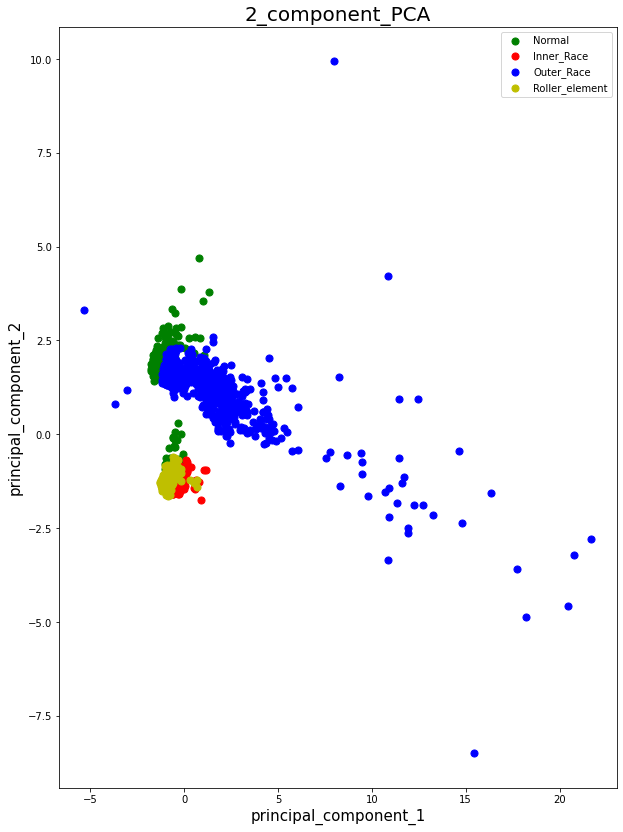

In [88]:
fig=plt.figure(figsize=(10,14))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('principal_component_1',fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_title('2_component_PCA',fontsize=20)
fault=['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element']

colors=['g','r','b','y']

for (fault,color) in zip(fault,colors):
    indicesTokeep = principalDF['fault']==fault
    ax.scatter(principalDF.loc[indicesTokeep,'principal_component_1']
              ,principalDF.loc[indicesTokeep,'principal_component_2']
               ,c = color
               , s=50
              )
ax.legend(['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element'])

In [68]:
sum(pca_2.explained_variance_ratio_)

0.7121585804775363

In [69]:
pca_2.explained_variance_ratio_

array([0.46624685, 0.24591173])

# PCA with Three Pricipal Component

In [70]:
from mpl_toolkits.mplot3d import Axes3D

In [71]:
X=StandardScaler().fit_transform(X)

pca_3=PCA(n_components=3)
X_pca=pca_3.fit_transform(X)

principalDF=pd.DataFrame(data= X_pca,columns =['principal_component_1','principal_component_2','principal_component_3']
                        )
principalDF['fault']=np.array(df['fault'])

In [73]:
principalDF

principal_component_1  principal_component_2  principal_component_3  \
0                 -0.362374              -0.719784               0.072365   
1                 -0.428415              -0.825876               0.051218   
2                 -0.441754              -0.910074               0.057759   
3                 -0.196796              -1.065233              -0.020470   
4                 -0.456439              -1.168438               0.022389   
...                     ...                    ...                    ...   
2182              -0.504550              -0.631717               0.232433   
2183               0.540771              -1.288510               0.083214   
2184               0.661659              -1.214905               0.104697   
2185               0.316338              -1.208408               0.180878   
2186               0.660175              -1.402596               0.132599   

               fault  
0             Normal  
1             Normal  
2             Normal  
3             Normal  
4             Normal  
...              ...  
2182  Roller_element  
2183  Roller_element  
2184  Roller_element  
2185  Roller_element  
2186  Roller_element  

[2187 rows x 4 columns]

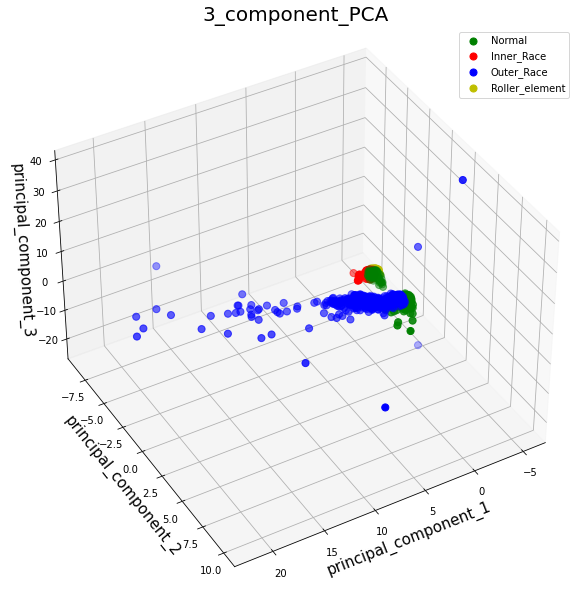

In [87]:
fig=plt.figure(figsize=(10,12))
ax=plt.axes(projection='3d')# for 3d projection


# define all 3 axes
fault=['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element']

colors=['g','r','b','y']

for (fault,color) in zip(fault,colors):
    indicesTokeep = principalDF['fault']==fault
    ax.scatter3D(principalDF.loc[indicesTokeep,'principal_component_1']
              ,principalDF.loc[indicesTokeep,'principal_component_2']
               ,principalDF.loc[indicesTokeep,'principal_component_3']
               ,c = color
               , s=50
              )
ax.legend(['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element'])

ax.set_xlabel('principal_component_1',fontsize=15)
ax.set_ylabel('principal_component_2',fontsize=15)
ax.set_zlabel('principal_component_3',fontsize=15)
ax.set_title('3_component_PCA',fontsize=20)

ax.view_init(39,60)

plt.show()

In [90]:
sum(pca_3.explained_variance_ratio_)

0.823652427141457

In [92]:
pca_3.explained_variance_ratio_

array([0.46624685, 0.24591173, 0.11149385])

In [93]:
df

max    min      mean  Standard deviation  RMS value  skewness  \
0     0.474 -0.649 -0.117502            0.095084   0.151153  0.018259   
1     0.430 -0.635 -0.115546            0.094157   0.149050 -0.002184   
2     0.410 -0.669 -0.116135            0.094178   0.149520 -0.000465   
3     0.417 -0.679 -0.117410            0.094600   0.150777 -0.080517   
4     0.356 -0.649 -0.117653            0.095163   0.151320 -0.042280   
...     ...    ...       ...                 ...        ...       ...   
2182  0.488 -0.598 -0.117200            0.117993   0.166306  0.154388   
2183  0.496 -0.830 -0.116559            0.142499   0.184095 -0.038668   
2184  0.552 -0.791 -0.118188            0.150242   0.191155 -0.023059   
2185  0.488 -0.820 -0.118192            0.146346   0.188110  0.052214   
2186  0.503 -0.754 -0.117210            0.164026   0.201597 -0.011990   

         kurtosis  crest factor  Form factor           fault  
0    -1440.871942      3.135900    -1.286386          Normal  
1    -1473.352595      2.884935    -1.289966          Normal  
2    -1479.575457      2.742100    -1.287473          Normal  
3    -1469.409786      2.765666    -1.284194          Normal  
4    -1437.917839      2.352625    -1.286158          Normal  
...           ...           ...          ...             ...  
2182  -606.613678      2.934349    -1.418989  Roller_element  
2183  -284.129255      2.694264    -1.579417  Roller_element  
2184  -233.339926      2.887714    -1.617372  Roller_element  
2185  -259.096354      2.594227    -1.591566  Roller_element  
2186  -163.187879      2.495076    -1.719959  Roller_element  

[2187 rows x 10 columns]

In [94]:
df['fault'].unique()

array(['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element'],
      dtype=object)

In [97]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [99]:
X.head()

max    min      mean  Standard deviation  RMS value  skewness  \
0  0.474 -0.649 -0.117502            0.095084   0.151153  0.018259   
1  0.430 -0.635 -0.115546            0.094157   0.149050 -0.002184   
2  0.410 -0.669 -0.116135            0.094178   0.149520 -0.000465   
3  0.417 -0.679 -0.117410            0.094600   0.150777 -0.080517   
4  0.356 -0.649 -0.117653            0.095163   0.151320 -0.042280   

      kurtosis  crest factor  Form factor  
0 -1440.871942      3.135900    -1.286386  
1 -1473.352595      2.884935    -1.289966  
2 -1479.575457      2.742100    -1.287473  
3 -1469.409786      2.765666    -1.284194  
4 -1437.917839      2.352625    -1.286158

In [100]:
y.head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: fault, dtype: object

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

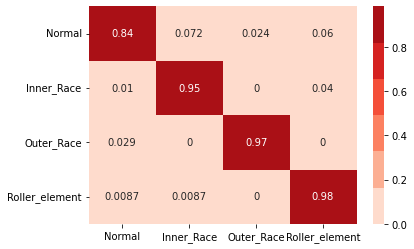

In [111]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix


rf_model = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

label = ['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element']

#creating a confusion_matrix
cm =  confusion_matrix(y_test,y_pred,labels=['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element'],normalize='true')

colormap = sns.color_palette('Reds')

sns.heatmap(cm,annot=True,cmap=colormap,xticklabels=label,yticklabels=label)

#  Test using this random forest Model

In [114]:
Test_no=2
Bearing_no=1

test_2=pd.read_csv('Time_feature_matrix_Bearing_{}_test_{}.csv'.format(Bearing_no,Test_no),index_col='Unnamed: 0')

In [115]:
test_2

max    min      mean  Standard deviation  RMS value  \
2004-02-12 10:32:00  0.454 -0.386 -0.010196            0.073477   0.074179   
2004-02-12 10:42:00  0.369 -0.388 -0.002585            0.075340   0.075382   
2004-02-12 10:52:00  0.503 -0.400 -0.002484            0.076191   0.076230   
2004-02-12 11:02:00  0.608 -0.576 -0.002277            0.078693   0.078724   
2004-02-12 11:12:00  0.391 -0.391 -0.002404            0.078439   0.078474   
...                    ...    ...       ...                 ...        ...   
2004-02-19 05:42:00  4.998 -5.000 -0.002752            0.725014   0.725001   
2004-02-19 05:52:00  2.688 -2.881 -0.004487            0.462001   0.462012   
2004-02-19 06:02:00  3.501 -3.696 -0.001703            0.483844   0.483835   
2004-02-19 06:12:00  0.005  0.000  0.001857            0.000987   0.002103   
2004-02-19 06:22:00  0.002 -0.005 -0.001162            0.001000   0.001533   

                     skewness      kurtosis  crest factor  Form factor  
2004-02-12 10:32:00  0.083987 -3.508090e+02      6.120331    -7.275307  
2004-02-12 10:42:00  0.052138 -8.123441e+01      4.895038   -29.161382  
2004-02-12 10:52:00  0.032806 -7.471073e+01      6.598472   -30.688508  
2004-02-12 11:02:00  0.041483 -6.036791e+01      7.723217   -34.579322  
2004-02-12 11:12:00  0.028222 -6.449977e+01      4.982524   -32.645152  
...                       ...           ...           ...          ...  
2004-02-19 05:42:00 -0.510519 -1.009961e+00      6.893779  -263.426419  
2004-02-19 05:52:00 -0.325344 -1.098478e+00      5.818035  -102.977656  
2004-02-19 06:02:00 -0.377068 -1.031075e+00      7.235932  -284.094983  
2004-02-19 06:12:00  0.579656  1.953823e+09      2.377543     1.132578  
2004-02-19 06:22:00  0.317009 -1.163921e+09      1.304860    -1.319089  

[984 rows x 9 columns]

In [116]:
y_pred_test_2=rf_model.predict(test_2)

In [117]:
y_pred_test_2

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Outer_Race', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Outer_Race', 'Outer_Race',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Outer_Race', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Outer_Race', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Norm

C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\4204834847.py:21: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(inner_race,inner_race[col])
C:\Users\Sony\AppData\Local\Temp\ipykernel_8616\4204834847.py:22: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(roll_elem.index,roll_elem[col])


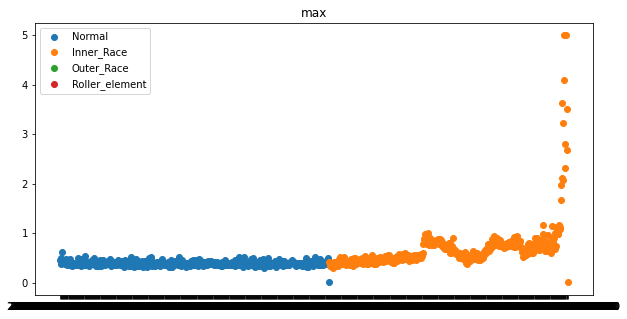

In [120]:
Test_no=2
Bearing_no=1

test_2=pd.read_csv('Time_feature_matrix_Bearing_{}_test_{}.csv'.format(Bearing_no,Test_no),index_col='Unnamed: 0')
y_pred_test_2=rf_model.predict(test_2)
test_2['fault']=y_pred_test_2


norm = test_2[test_2['fault']=='Normal']
out_race =test_2[test_2['fault']=='Outer_Race']
inner_race = test_2[test_2['fault']=='Inner_Race']
roll_elem =  test_2[test_2['fault']== 'Roller_element']


#########################################################################
col= "max"

plt.figure(figsize=(10,5))
plt.scatter(norm.index,norm[col])
plt.scatter(out_race.index,out_race[col])
plt.scatter(inner_race,inner_race[col])
plt.scatter(roll_elem.index,roll_elem[col])

plt.legend(['Normal', 'Inner_Race', 'Outer_Race', 'Roller_element'])
plt.title(col)
plt.show()